# 9. DEPENDENCY PARSING USING STANZA

9.1 Simple Dependency Parsing Program

In [9]:
!pip install stanza
import stanza

In [21]:
nlp=stanza.Pipeline('en')

2025-07-30 08:56:57 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 08:56:59 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 08:56:59 INFO: Using device: cpu
2025-07-30 08:56:59 INFO: Loading: tokenize
2025-07-30 08:56:59 INFO: Loading: pos
2025-07-30 08:56:59 INFO: Loading: lemma
2025-07-30 08:56:59 INFO: Loading: constituency
2025-07-30 08:56:59 INFO: Loading: depparse
2025-07-30 08:56:59 INFO: Loading: sentiment
2025-07-30 08:57:00 INFO: Loading: ner
2025-07-30 08:57:00 INFO: Done loading processors!


In [17]:
sentence="The quick brown fox jumps over the lazy dog."

In [18]:
doc=nlp(sentence)
print("Word\tHead\tRelation")

Word	Head	Relation


In [19]:
for sent in doc.sentences:
    for word in sent.words:
        head=sent.words[word.head-1].text if word.head>0 else "ROOT"
        print(f"{word.text}\t{head}\t{word.deprel}")

The	fox	det
quick	fox	amod
brown	fox	amod
fox	jumps	nsubj
jumps	ROOT	root
over	dog	case
the	dog	det
lazy	dog	amod
dog	jumps	obl
.	jumps	punct


9.2 Advanced Dependency Tree Visualization using networkx+matplotlib

In [27]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt


In [28]:
nlp=stanza.Pipeline('en')
sentence="The quick brown fox jumps over the lazy dog."

doc=nlp(sentence)

2025-07-30 09:15:03 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 09:15:04 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 09:15:04 INFO: Using device: cpu
2025-07-30 09:15:04 INFO: Loading: tokenize
2025-07-30 09:15:04 INFO: Loading: pos
2025-07-30 09:15:04 INFO: Loading: lemma
2025-07-30 09:15:04 INFO: Loading: constituency
2025-07-30 09:15:05 INFO: Loading: depparse
2025-07-30 09:15:05 INFO: Loading: sentiment
2025-07-30 09:15:05 INFO: Loading: ner
2025-07-30 09:15:05 INFO: Done loading processors!


In [168]:
G=nx.DiGraph()
for sent in doc.sentences:
    for word in sent.words:
        head_text="ROOT" if word.head==0 else sent.words[word.head-1].text
        G.add_edge(head_text,word.text,label=word.deprel)

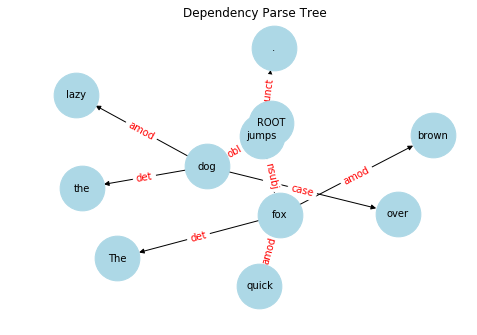

In [207]:
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
plt.title("Dependency Parse Tree")
plt.show()